# Pymaceuticals Inc.
---

### Analysis

While analyzing the plots created below, we can see that the mice given Capomulin and Ramicane as the treatment seemed to have a low average tumor volume compared to the mice given other treatments. When looking specifically at the box plot, we can see that the median is lower for both treatments compared to the other treatments for final tumor volume. 
We can also see that both drug regimens also have the greatest amount of timepoints taken, meaning we can infer that the longer the treatment is given, the lower the tumor volume will be. While looking at the line plot for Capomulin we can see how that may be true since the greater the time point is, the lower the tumor volume becomes, showing a descending line plot. 

Another observation we can make is the correlation between weight and tumor volume. The correlation value is 0.84 for weight and tumor volume in the group where mice are given the drug Capomulin, showing that there is a strong positive correlation between the two values. This can be seen while looking at the linear regression model as well, where we see an ascending scatter plot and regression line.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
mice_data_df = merged_data_df[merged_data_df['Timepoint'] == 0]
mice_data_df = mice_data_df.reset_index(drop=True)

# Display the data table for preview
mice_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = len(mice_data_df['Mouse ID'].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mice_data_df['Mouse ID'].loc[mice_data_df.duplicated()]

print(duplicate_id)

108    g989
Name: Mouse ID, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = merged_data_df[merged_data_df['Mouse ID'] == 'g989']
duplicate_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = merged_data_df[merged_data_df['Mouse ID'] != 'g989']
clean_mice_df = clean_merged_df[clean_merged_df['Timepoint'] == 0]

clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_df['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_merged_df.groupby(clean_merged_df['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_TV = regimen_group['Tumor Volume (mm3)'].mean()
median_TV = regimen_group['Tumor Volume (mm3)'].median()
var_TV = regimen_group['Tumor Volume (mm3)'].var()
std_TV = regimen_group['Tumor Volume (mm3)'].std()
sem_TV = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({'Mean Tumor Volume': mean_TV,
                             'Median Tumor Volume': median_TV,
                             'Tumor Volume Variance': var_TV,
                             'Tumor Volume Std. Dev.': std_TV,
                             'Tumor Volume Std. Err.': sem_TV})

stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stat = clean_merged_df.groupby(clean_merged_df['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
agg_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
# Export statistics summary to analysis folder
#agg_stat.to_csv('Analysis_Images/DrugRegimen_summary_stats.csv')

## Bar and Pie Charts

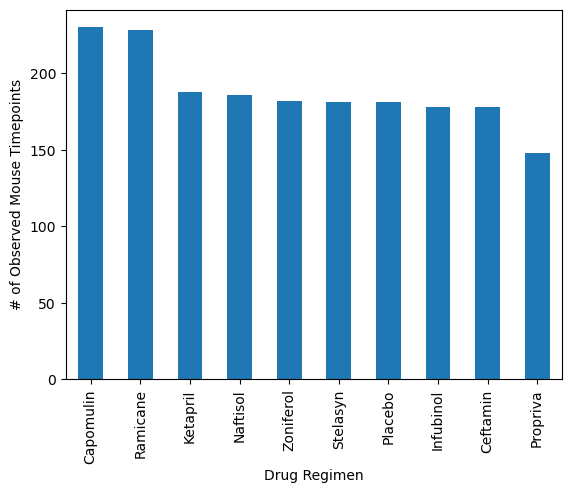

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_merged_df['Drug Regimen'].value_counts().plot(kind='bar')

# Axis Display
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Export image
#plt.savefig('Analysis_Images/BarChart.png')

plt.show()


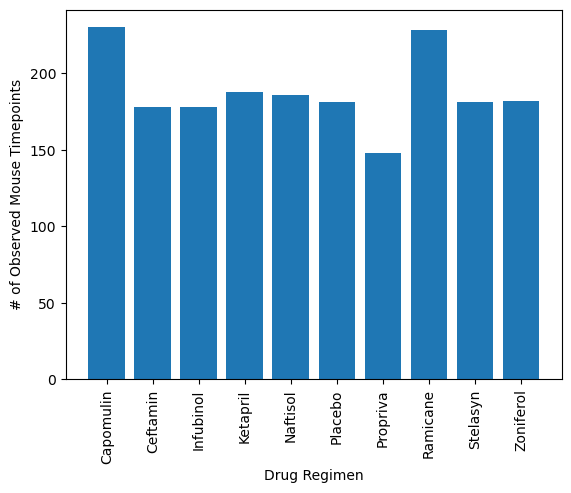

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
DrugGroup_Timepoint = clean_merged_df.groupby(clean_merged_df['Drug Regimen']).count()['Timepoint']

x_axis = DrugGroup_Timepoint.index.values
y_axis = list(DrugGroup_Timepoint)

# Axis Display
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

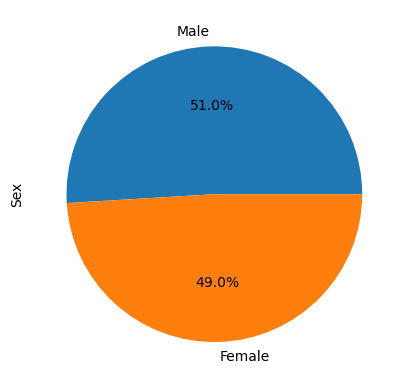

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_merged_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Axis Display
plt.ylabel('Sex')

# Export image
#plt.savefig('Analysis_Images/PieChart.png')

plt.show()


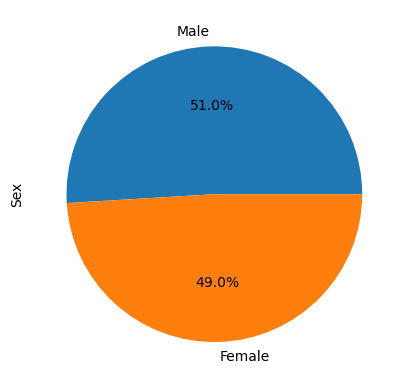

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_merged_df['Sex'].value_counts()
labels = sex_count.index.values

plt.pie(sex_count, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_merged_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(max_timepoints)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_lastTP_df = pd.merge(clean_merged_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='right')
clean_lastTP_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_vol = clean_lastTP_df.loc[clean_lastTP_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(temp_vol)
    
    # Determine outliers using upper and lower bounds
    # Find the IQR first
    quartiles = temp_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = (upperq - lowerq)

    # Calculate upper and lower bounds
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq + (1.5 * IQR)

    # Find the outliers by using upper and lower bound
    outliers = temp_vol.loc[(temp_vol < lower_bound) | (temp_vol > upper_bound)]
    print(f"{treatment}'s potential outliers:{outliers}\n")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)



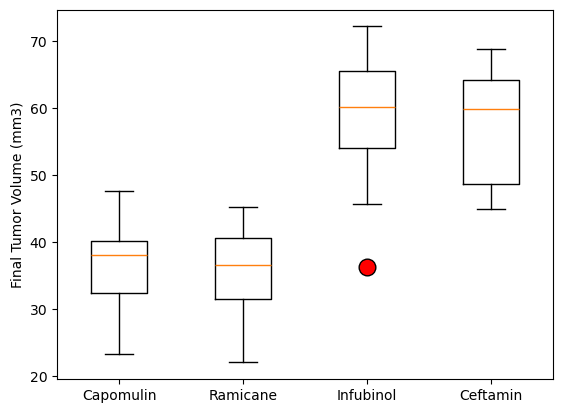

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, flierprops=dict(markerfacecolor='red', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')

# Export image
#plt.savefig('Analysis_Images/BoxPlot.png')

plt.show()

## Line and Scatter Plots

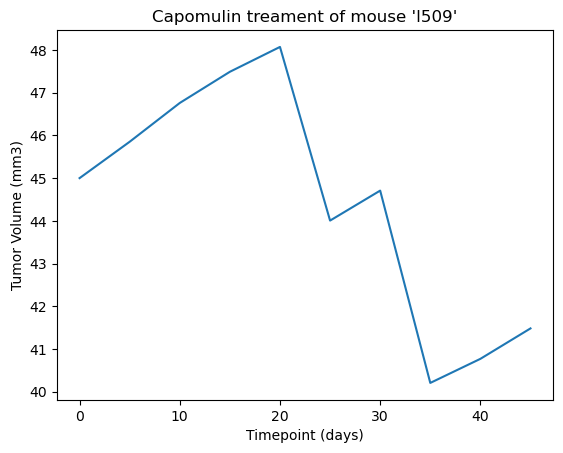

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# identified mouse has lowercase letter 'l' as in 'like'
identified_mouse = clean_merged_df.loc[clean_merged_df['Mouse ID'] == 'l509']

# tumor vol and timepoint
id_tumorvol = identified_mouse['Tumor Volume (mm3)']
id_timepoint = identified_mouse['Timepoint']

# Create line plot
plt.plot(id_timepoint, id_tumorvol)
plt.title("Capomulin treament of mouse 'l509'")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Export image
#plt.savefig('Analysis_Images/IDedLinePlot.png')

plt.show()

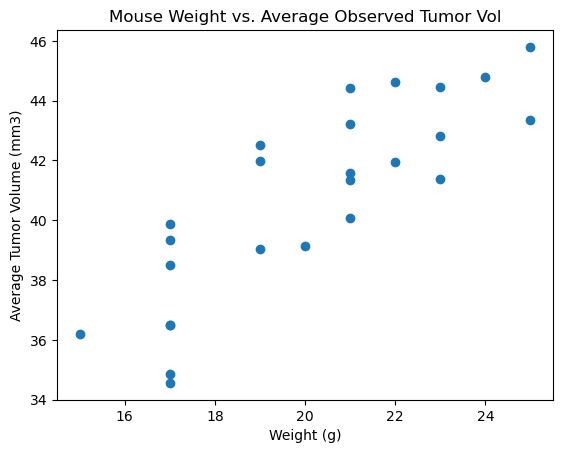

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_regimen = clean_merged_df.loc[clean_merged_df['Drug Regimen'] == 'Capomulin']

# mouse weight and average tumor vol
weight = cap_regimen.groupby(cap_regimen['Mouse ID'])['Weight (g)']
mouse_weight = weight.mean()

tumorvol = cap_regimen.groupby(cap_regimen['Mouse ID'])['Tumor Volume (mm3)']
avg_tumorvol = tumorvol.mean()

# create scatterplot
plt.scatter(mouse_weight, avg_tumorvol)
plt.title('Mouse Weight vs. Average Observed Tumor Vol')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Export image
#plt.savefig('Analysis_Images/ScatterPlot.png')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


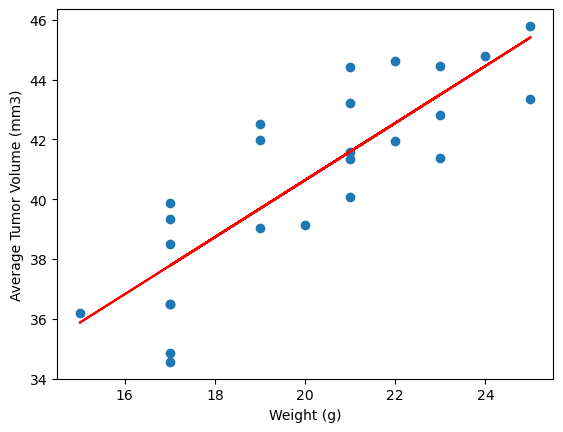

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# use the same information created for above scatter plot

# find correlation
correlation = st.pearsonr(mouse_weight, avg_tumorvol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# find and create regression model
x_val = mouse_weight
y_val = avg_tumorvol

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_values = x_val * slope + intercept

# create scatterplot and lineregression
plt.scatter(mouse_weight, avg_tumorvol)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Export image
#plt.savefig('Analysis_Images/LinRegressionModel.png')

plt.show()